# Some fundamentals of multivariate calculus to help understand Batch Normalization 

### 一些多元微积分的原理来解释 Batch Normalization

Prof Richard Xu, 徐亦达

University of Technology Sydney (UTS)

Yida.Xu@uts.edu.au

2018-02-17

* In batch normalization paper, the key is to have the following **neuron (pesudo) whitenning** process:

在 batch normalization 文章里，关键的一步是对于每层的原子做一些 数据/原子**伪白化**的工作

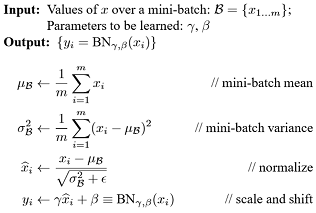

In [1]:
from IPython.core.display import Image 
Image(filename='bn.png')

### rewrite it by adding inputs from previous layer

I'd like to stick to the more neural networks *notation*:

* traditional neural networks has a linear layer followed by activation layer 传统的神经网络是，线性层加激活层

$z = W^\top {\bf x}$, $\hspace{5mm}$ then $a = \sigma(z)$

* now with **batch normalization**:  we insert *BN* layer between the linear and activation layer, 在用batch normalization 的时候，BN 层夹在线性和激活层之间

$\hat{z} = W^\top {\bf x}$,  $\hspace{5mm}$ followed by BN layer: $z = \text{BN}_{\gamma,\beta}\left(\hat{z}\right)$, $\hspace{5mm}$  then $a = \sigma(z)$


where

- $\mu_{\mathbf{B}} \leftarrow \frac{1}{m} \sum_{i=1}^m \hat{z}_i$
- $\sigma^2_{\mathbf{B}} \leftarrow \frac{1}{m} \sum_{i=1}^m (\hat{z}_i - \mu_{\mathbf{B}})^2$
- $\widehat{z}_{i} \leftarrow \frac{\hat{z}_i - \mu_{\mathbf{B}} }{\sqrt{ \sigma^2_{\mathbf{B}} + \epsilon } }$
- $z_i \leftarrow \gamma \widehat{z}_i + \beta$

### Let's visualise it

<IPython.core.display.Javascript object>


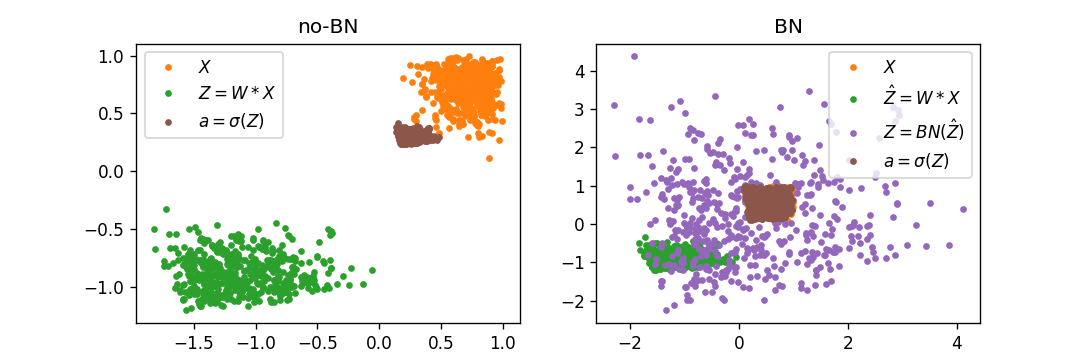

In [52]:
%matplotlib notebook
from matplotlib.widgets import Button
import matplotlib.pyplot as plt
import numpy as np
import math


fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('no-BN')

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('BN')


@np.vectorize
def sigmoid_func(x): 
    return 1/(1 + math.exp(-x))


# ------------------ parameeters of BN -----------------------------

W = np.mat([[-2.0, 0.4],[-0.24, -1]])
gamma = 1.2
beta = 0.2

# -------------------traditional ------------------------------------


mean = np.array([2,1])
Sigma = np.mat([[1.5,-0.5],[-0.5,1.2]])
N = 500
np.random.seed(356)
X = np.random.beta(5,2,[N,2])

#print X[1,:]

Z_hat = np.transpose(W * np.transpose(X))

Z_no_bn = Z_hat

a_no_bn = sigmoid_func(Z_no_bn)


# ------------------------  BN ----------------------------------

mu = np.array(np.mean(Z_hat,axis=0)).ravel()
varss = np.array(np.var(Z_hat,axis=0)).ravel()

sigmas = np.sqrt(varss)

#print Z_hat[1,:]
#print mu, sigmas

epsilon = 0.001

mean_subtracted = Z_hat - np.reshape(np.repeat(mu,Z_hat.shape[0]),[Z_hat.shape[0],-1],1)

Z_widehat = np.column_stack((mean_subtracted[:,0]/sigmas[0], mean_subtracted[:,1]/sigmas[1]))


Z_bn = Z_widehat * gamma + beta

a_bn = sigmoid_func(Z_bn)

plot_data = {'X': X, 'Z_hat': Z_hat, 'Z_no_bn': Z_no_bn, 'a_no_bn': a_no_bn, 'Z_widehat': Z_widehat, 'Z_bn': Z_bn, 'a_bn': a_bn }

class BN_plot:
    
    def __init__(self,indices, plot_data):
                
        self.indices = indices
        self.cid = fig.canvas.mpl_connect('button_press_event', self)
        
            
        self.plot_data = plot_data
       

    def __call__(self, event):
        
        ax = event.inaxes
        print('click', ax)
        
        
        if ax.get_title() == 'no-BN':
         
            if self.indices[0] == 1:
                X = self.plot_data['X']
                h11 = ax.plot(X[:,0], X[:,1],'.', color='C1') 
                ax.legend(['$X$'])
                
            
            if self.indices[0] == 2:
                Z_no_bn = self.plot_data['Z_no_bn']
                h12 = ax.plot(Z_no_bn[:,0], Z_no_bn[:,1],'.',color='C2') 
                ax.legend(['$X$','$Z = W * X$'])

                
            
            if self.indices[0] == 3:
                a_no_bn = self.plot_data['a_no_bn']
                ax.plot(a_no_bn[:,0], a_no_bn[:,1],'.',color='C5') 
                ax.legend(['$X$','$Z = W * X$','$a = \sigma(Z)$'])
                    
            self.indices[0] = self.indices[0] + 1
                
        if ax.get_title() == 'BN':
            
            if self.indices[1] == 1:
                X = self.plot_data['X']
                ax.plot(X[:,0], X[:,1],'.',color='C1') 
                ax.legend(['$X$'])
            
            if self.indices[1] == 2:
                Z_hat = self.plot_data['Z_hat']
                ax.plot(Z_hat[:,0], Z_hat[:,1],'.',color='C2') 
                ax.legend(['$X$','$\hat{Z} = W * X$','$a = \sigma(Z)$'])
            
#            if self.indices[1] == 3:
#                Z_widehat = self.plot_data['Z_widehat']
#                ax.plot(Z_widehat[:,0], Z_widehat[:,1],'.',color='C3') 
                
            if self.indices[1] == 3:
                Z_bn = self.plot_data['Z_bn']
                ax.plot(Z_bn[:,0], Z_bn[:,1],'.',color='C4')
                ax.legend(['$X$','$\hat{Z} = W * X$','$Z = BN(\hat{Z})$'])
            
            if self.indices[1] == 4:
                a_bn = self.plot_data['a_bn']
                ax.plot(a_bn[:,0], a_bn[:,1],'.',color='C5') 
                ax.legend(['$X$','$\hat{Z} = W * X$','$Z = BN(\hat{Z})$', '$a = \sigma(Z)$'])


            
            #ax.text(0,0, str(self.indices[1]) + ax.get_title(), va="bottom", ha="left")
            self.indices[1] = self.indices[1] + 1
            
        

text1=ax1.text(0,0, "", va="bottom", ha="left")
text2=ax2.text(0,0, "", va="bottom", ha="left")
indices = [1,1]
linebuilder = BN_plot(indices,plot_data)
plt.show()

## Motivation

We use BN as an opportunity/excuse, to disucss the followings:

* What is Data Whitening 
* Why BN(or Data Whitening in general) brings symmetric quadratic function which helps faster gradient descent

Some multivariate calculus fundamentals on:

* Why gradient vector is orthogonal to level curve
* Prove why the steepest descent direction is found at $(x_0, y_0)$ is at $f'(x_0, y_0)$


我们利用BN 作为一个契机，讲述一下:


* 啥是数据白化
* 为什么损失函数拥有圆形的水平曲线, 梯度下降会快

我们还多唠叨下一些多元微积分的原理

* 为什么梯度向量和水平曲线是垂直的呢
* 证明在$(x_0, y_0)$，梯度下降最大的方向是 $f'(x_0, y_0)$


## 1. Data Whitening 数据白化

To understand what is data whitening: let's started by sampling data from multivariate Gaussian distribution:
$X \sim \mathcal{N}\left(\mu, \Sigma \right)$

首先，想知道啥是数据白化，我们先从多元正态分布产生“非白化”数据 $X \sim \mathcal{N}\left(\mu, \Sigma \right)$

Let $\mu = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ and 
$\Sigma = \begin{bmatrix} 2 & 1 \\ 1 & 1 \end{bmatrix} $

<function matplotlib.pyplot.show>

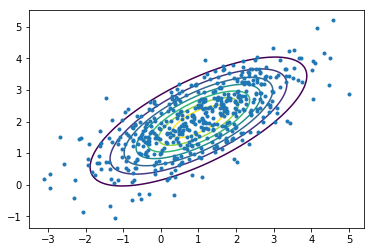

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline  

mean = [1,2]
Sigma = np.mat([[2,1],[1,1]])
N = 500
data = np.random.multivariate_normal(mean,Sigma,N)
plt.plot(data[:,0], data[:,1],'.')
#print data

delta = 0.025
Xmesh, Ymesh = np.meshgrid(np.arange(mean[0]-3, mean[0]+3, delta),  np.arange(mean[1]-3, mean[1]+3, delta) )

pos = np.empty(Xmesh.shape + (2,))
pos[:, :, 0] = Xmesh
pos[:, :, 1] = Ymesh

from scipy.stats import multivariate_normal
rv = multivariate_normal(mean, Sigma)
plt.contour(Xmesh, Ymesh, rv.pdf(pos))
plt.show

Data whitening means that you need to transform each dimension of data to be distributed as standard Gaussian: $\mathcal{N}(0,1)$ 

1. compute the sample mean $\mu$ and covariance matrix $\Sigma$
2. then transform the data with $x' = \Sigma^{- \frac{1}{2}} (x - \mu) $
Therefore, each dimension: $x' \sim \mathcal{N} \left(\mu, \Sigma \right)$



数据白化就是让数据的每一个维度都是服从标准正态分布， 方法是：


1. 计算出样本的均值 $\mu$ 与协方差矩阵 $\Sigma$
2. 然后把数据样本转化成 $x' = \Sigma^{ - \frac{1}{2}} (x - \mu) $

然后，$x'$ 的每一个维度都是服从标准正态分布

<class 'numpy.matrixlib.defmatrix.matrix'>


<function matplotlib.pyplot.show>

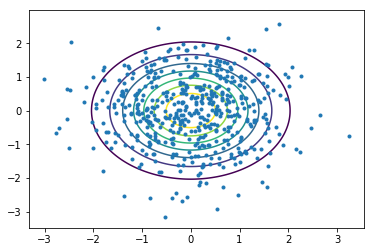

In [3]:
from scipy import linalg

s_mean = np.mean(data,axis=0)
s_Sigma = np.cov(np.transpose(data))

# mean subtracted array
mean_array = np.reshape(np.repeat(s_mean,data.shape[0]),[data.shape[0],-1],1)

inv_Sigma = np.mat(linalg.fractional_matrix_power(s_Sigma, -0.5))
print type(inv_Sigma)

data_prime = inv_Sigma * np.transpose(data - mean_array)

data_prime = np.transpose(data_prime)

# note that plt.plot treats horizontal and vertical data very differently
plt.plot(data_prime[:,0], data_prime[:,1],'.')

delta = 0.025
Xmesh, Ymesh = np.meshgrid(np.arange(-3.0, 3.0, delta),  np.arange(-3.0, 3.0, delta) )
pos = np.empty(Xmesh.shape + (2,))
pos[:, :, 0] = Xmesh
pos[:, :, 1] = Ymesh

from scipy.stats import multivariate_normal
rv = multivariate_normal(np.array(np.mean(data_prime,axis=0)).ravel(), np.cov(np.transpose(data_prime)))
plt.contour(Xmesh, Ymesh, rv.pdf(pos))
plt.show


### Batch normalization is **not** a "true data whitening"

* Note that **Batch Normalization algorithm** has two extra parameters, scale $\gamma$ and shift $\beta$ to help to cater for flexibility of the distribution: otherwise, using a standard whitening algorithm, it forces each dimension to be a standard Gaussian, which can be limiting.

注意在 Batch Normalization 算法中的实现不是传统的数据白化。如果硬是让原子的每一个维度都成为标准高斯分布的话，模型可能比较受限。所以BN算法提出加了两个参数 $\gamma$ 和 $\beta$ 增加原子分布的灵活度


* Note that for each layer: same $\gamma$ and $\beta$ is used for all neurons dimensions. However, different layers will their own $\gamma$ and $\beta$

注意每层的原子的每个维度都共享一个$\gamma$ 和 $\beta$。但每层都有自己的 $\gamma$ and $\beta$


* Batch normalization also makes learning faster by *de-coupling* the learning of higher layer’s parameters from the lower layer ones by constraining the distributions of neurons in-betweens; BN also has a slight regulation effect. For more details, please refer to Andrew Ng's video course. My course does not need to repeat this.

Batch Normalization 算法还有好处是，将神经网络的高层与低层参数学习 de-couple, 因为层次当中的原子的分布被有所固定。而且BN还有一点儿正则的功能。建议看下吴恩达的视频。我的课程不重复了。


## 2. Batch Normalization

Imagine we have the following error/loss function: (we demonstrate it using 2-d)

想象一下我们有以下的损失函数:

$\begin{equation} 
\mathcal{L}_{\bf w}(X,Y) = \mathbb{E}_{{\bf x} \sim } \left[ \sum_{i=1}^N \left( y_i - {\bf w}^\top {\bf x}_i \right)^2 \right] \\
%---------------------
= \mathbb{E}_{{\bf x} \sim } \left[ \sum_{i=1}^N y_i^2 - 2 y_i {\bf w}^\top {\bf x}_i + ( {\bf w}^\top {\bf x}_i )^2  \right] \\
= \mathbb{E}_{{\bf x} \sim } \left[ \sum_{i=1}^N y_i^2 - 2 y_i (w_1 x_1 + w_2 x_2 ) + ( w_1 x_1 + w_2 x_2 )^2  \right] \\
= \sum_{i=1}^N y_i^2 - 2 y_i w_1 \mathbb{E}_{x_1 \sim } \big[x_1 \big] - 2 y_i w_2 \mathbb{E}_{x_2 \sim } \big[ x_2 \big] + w_1^2  \mathbb{E}_{x_1 \sim } \big[ x_1^2 \big] + w_2^2 \mathbb{E}_{x_2 \sim } \big[ x_2^2 \big] + 2 w_1 w_2 \mathbb{E}_{ {\bf x} \sim } \big[ x_1 x_2 \big] \\
\end{equation}
$

### "whitened" neurons: 

* In Batch Normalization, we force neuron at each layer $x_1 \sim \mathcal{N}(0,1)$ and $x_2 \sim \mathcal{N}(0,1)$ Therefore a lot of terms in the above becomes zero.

用Batch Normalization, 我们硬是让每层的神经原子$x_1$ and $x_1$从标准正态分布产生的, 所以上面的损失函数很多项都成为零了：

$\mathcal{L}_{\bf w}(X,Y) = 
\sum_{i=1}^N y_i^2 + w_1^2  \mathbb{E}_{x_1 \sim } \big[ x_1^2 \big] + w_2^2 \mathbb{E}_{x_2 \sim } \big[ x_2^2 \big] \\
$

* Then the error surface $\mathcal{L}_{\bf w}(X,Y)$ is a symmetric quadratic, i.e., its level contour is circular, rather than elliptical:

损失函数也成为“对称”的二次函数，他的水平曲线是圆形而不是椭圆型

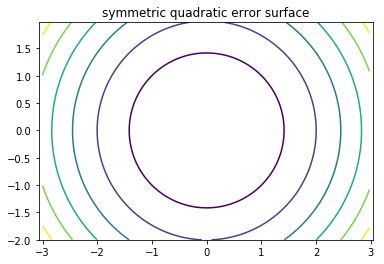

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data_prime = np.array(data_prime)

@np.vectorize
def objective(w0, w1):
    return sum((data_prime[:,0] *  np.repeat(w0,N))**2 + (data_prime[:,1] *  np.repeat(w1,N))**2)

delta = 0.025
W0mesh, W1mesh = np.meshgrid(np.arange(-3.0, 3.0, delta),  np.arange(-2.0, 2.0, delta))

Z = objective(W0mesh, W1mesh)

plt.figure()
plt.contour(W0mesh, W1mesh, Z)
plt.title('symmetric quadratic error surface')
plt.axes().set_aspect('equal', 'datalim')

We know that if we have an error function has square contour, the gradient descent is going to be much faster.

我们都知道如果损失函数拥有圆形的水平曲线, 梯度下降会快.

## 3. Convergence for Error/loss function

* So why does error surface with circular level contour results much faster gradient descent? Let's take a look at **symmetric quadratic** error surface, and **unsymmetric quadratic** error surface

为啥如果损失函数拥有圆形的水平曲线, 梯度下降会快很快？我们分别比较**对称二次函数**和**非对称二次函数**

### symmetric quadratic error surface  对称二次函数

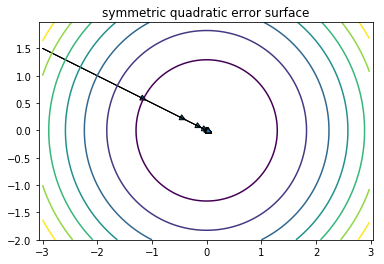

In [6]:
import numpy as np
import matplotlib.pyplot as plt

const = 3;

weight_matrix = np.mat([[const, 0],[0, const]])


@np.vectorize
def objective(w0, w1):
    return np.mat([w0,w1]) * weight_matrix * np.mat([[w0], [w1]])

def derivative(w0, w1):
    return 2 * np.array(np.mat([w0,w1]) * weight_matrix).ravel()

delta = 0.025
W0mesh, W1mesh = np.meshgrid(np.arange(-3.0, 3.0, delta),  np.arange(-2.0, 2.0, delta))

Z = objective(W0mesh, W1mesh)

plt.figure()
plt.contour(W0mesh, W1mesh, Z)

MAX_ITER = 20

pt = [-3,1.5]
learning_rate = 0.1

ax = plt.axes()

for t in range(MAX_ITER):
    
    pt_temp = pt - learning_rate * derivative(pt[0], pt[1])
    ax.arrow(pt[0], pt[1], pt_temp[0] - pt[0], pt_temp[1] - pt[1], head_width=0.1, head_length=0.1)    
    pt = pt_temp

plt.title('symmetric quadratic error surface')
plt.axes().set_aspect('equal', 'datalim')


### unsymmetric quadratic error surface 非对称二次函数

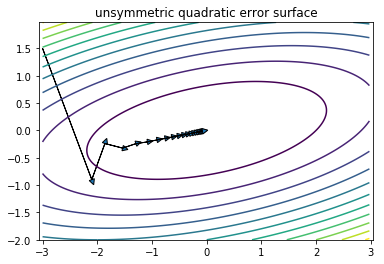

In [7]:
import numpy as np
import matplotlib.pyplot as plt

const = 3;

weight_matrix = np.mat([[const/2, -1],[-1, const*2]])

@np.vectorize
def objective(w0, w1):
    return np.mat([w0,w1]) * weight_matrix * np.mat([[w0], [w1]])

def derivative(w0, w1):
    return 2 * np.array(np.mat([w0,w1]) * weight_matrix).ravel()

delta = 0.025
W0mesh, W1mesh = np.meshgrid(np.arange(-3.0, 3.0, delta),  np.arange(-2.0, 2.0, delta))

Z = objective(W0mesh, W1mesh)

plt.figure()
plt.contour(W0mesh, W1mesh, Z,11)

MAX_ITER = 20

pt = [-3,1.5]
learning_rate = 0.1

ax = plt.axes()

for t in range(MAX_ITER):
    
    pt_temp = pt - learning_rate * derivative(pt[0], pt[1])
    ax.arrow(pt[0], pt[1], pt_temp[0] - pt[0], pt_temp[1] - pt[1], head_width=0.1, head_length=0.1)    
    pt = pt_temp

plt.title('unsymmetric quadratic error surface')
plt.axes().set_aspect('equal', 'datalim')

## 4. Extra stuff: why gradient vector is orthogonal to level curve?
## 为什么梯度向量和水平曲线是垂直的呢？

The gradient vector $f'(x_0, y_0)$ is orthogonal to tangent of level curve $f(x,y) = k$ at point $(x_0, y_0)$. 

But why?
是为啥呢？

* Let $P = (x_0, y_0)$

* There is a particular level curve $f(x,y) = k$ that contains $P$ (of course, not every level curve contains $P$)

我们找出一个水平曲线 $f(x,y) = k$ 让 $P$ 也在此曲线上。(当然 $P$ 不可能出现在任意的水平曲线上)

* We let parametric vector equation of this level curve to be ${\bf r}(t) = \big( x(t), y(t) \big)$, for example: $\big( x(t) = A \cos(t), y(t) = B \sin(t) \big)$

我们让这个水平曲线的向量公式是 ${\bf r}(t) = \big( x(t), y(t) \big)$

* Suppose $t_0$ be the value of $t$ such that:

${\bf r}(t_0) = \big( x(t_0), y(t_0) \big) = ( x_0, y_0)$



* Because of the level curve $f(x,y) = k$:

$f \big( x(t), y(t)\big) = k \implies \frac{\text{d} f}{ \text{d} t} = f'(x,y)^\top {\bf r}'(t) = 0
$

Note that ${\bf r}'(t_0)$ is the tangent vector at point ${\bf r} (t_0)$

这个很关键，${\bf r}'(t_0)$ 是水平曲线 ${\bf r} (t_0)$的切线

* now we substitute $t=t_0$:

$
f'(x_0, y_0)^\top {\bf r}'(t_0) = 0
$

* Therefore, gradient vector $f'(x_0, y_0)$ is orthogonal to tangent of level curve $f(x,y) = k$ at point $(x_0, y_0)$. 


### Example

* In this example, we let $\underbrace{\frac{x^2}{A^2} + \frac{y^2}{B^2}}_{f(x,y)} = \underbrace{1}_{k}$

* gradient vector is: $\frac{\partial f}{\partial x, \partial y} = \left[ \frac{2 x}{A^2}, \frac{2 y}{B^2} \right]$

* the level contour is: ${\bf r}(x(t),y(t)) = [ A \cos(t), B \sin(t) ]$

* $\frac{\text{d} \left( {\bf r}(x(t),y(t)) \right) }{\text{d} t} = [ - A \sin(t), B \cos(t) ]$

We let $t_0 = 0.5 \implies P = [A \cos(0.5), B \sin(0.5)]$

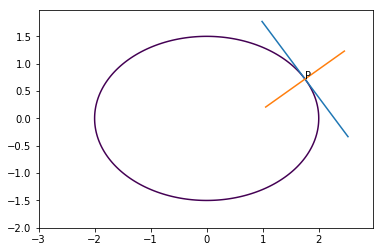

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

A = 2
B = 1.5

t = 0.5
k = 1

x_0 = A*math.cos(t);
y_0 = B*math.sin(t);

P = [x_0,y_0]

# [df/dx, df/dy]
d_func = [2*P[0]/A**2,2*P[1]/B**2]

# dR/dt = [dx/dt, dy/dt]
d_R = [-A*math.sin(t), B*math.cos(t)]


delta = 0.025
X, Y = np.meshgrid(np.arange(-3.0, 3.0, delta),  np.arange(-2.0, 2.0, delta))

# this is to plot an implicit function
l_length = 0.8

plt.contour(X, Y, X**2/(A**2) + Y**2/(B**2), [k])
plt.text(P[0],P[1], "P")

# plot the gradient of the contour
plt.plot([P[0] - d_R[0] * l_length, P[0] +  d_R[0] * l_length ], 
         [P[1] - d_R[1] * l_length, P[1] +  d_R[1] * l_length ])


# plot the gradient of steepest descent

plt.plot([P[0] - d_func[0] * l_length, P[0] +  d_func[0] * l_length ], 
         [P[1] - d_func[1] * l_length, P[1] +  d_func[1] * l_length ])



## 5. Prove why steepest descent direction found at $(x_0, y_0)$ is at $f'(x_0, y_0)$

## 证明在$(x_0, y_0)$，梯度下降最大的方向是 $f'(x_0, y_0)$

####  Directional derivative of $f$ in direction ${\bf u}$ 

* Let ${\bf u}$ be unit vector $\|u \| = 1$. 
* Therefore, directional derivative of $f$ in direction ${\bf u}$ is defined as limit:

$\text{D}_{\bf u} ({\bf a}) = \lim_{h \rightarrow 0} \frac{f ( {\bf a} + h {\bf u} ) - f({\bf a}) }{ h}$:

* Let ${\bf u} = u_1 {\bf e}_1 + u_1 {\bf e}_1 + \cdots + u_n {\bf e}_n$:

* Let **taylor expansion** of degree 1 of $f$ to be $\tilde{f}$ around point ${\bf a}$

$\tilde{f}(x) \approx f({\bf a}) + \frac{\partial f}{\partial x_1}({\bf a})(x_1 - a_1) + \cdots +  \frac{\partial f}{\partial x_n} ({\bf a})(x_n - a_n)$:

* by substitute $x = {\bf a} + h {\bf u}$:

$\tilde{f}({\bf a} + hu) \approx f({\bf a}) + \frac{\partial f}{\partial x_1} ({\bf a})(\underbrace{a_1 + h u_1}_{x_1} - a_1) + \cdots +  \frac{\partial f}{\partial x_n} ( {\bf a} )(\underbrace{a_n + h u_n}_{x_n} - a_n)\\
=  f({\bf a}) + \frac{\partial f}{\partial x_1}({\bf a})(h u_1 ) + \cdots +  \frac{\partial f}{\partial x_n} ({\bf a})(h u_n )\\
=  f({\bf a}) + h \left( \frac{\partial f}{\partial x_1}({\bf a})(u_1 ) + \cdots +  \frac{\partial f}{\partial x_n} ({\bf a})( u_n )\right)\\
=  h \big( \triangledown f ({\bf a})^\top {\bf u} \big)
$

* Therefore, 


$\text{D}_{\bf u} (a) = \lim_{h \rightarrow 0} \frac{ f ( {\bf a} + h {\bf u}) - f({\bf a})}{ h}\\
= \lim_{h \rightarrow 0} \frac{\tilde{f} ( {\bf a} + h {\bf u}) - f({\bf a})}{ h}\\
= \lim_{h \rightarrow 0} \frac{h \big( \triangledown f ({\bf a})^\top {\bf u} \big)}{ h}\\
= \triangledown f ({\bf a})^\top {\bf u}
$

#### maximum and minimum value of $\triangledown f ({\bf a})^\top {\bf u}$

Since ${\bf u}$ can be any unit vector, it is clear that: 

* dot product: $\triangledown f ({\bf a})^\top {\bf u} = \| \triangledown f ({\bf a}) \| \cos(\theta)$ 
* $\text{D}_{\bf u} (a)$ has maximum when ${\bf u}$ in **same direction** as $\triangledown f ({\bf a})$, i.e., $\theta = 0$
* $\text{D}_{\bf u} (a)$ has minimum when ${\bf u}$ in **opposite direction** as $\triangledown f ({\bf a})$, i.e., $\theta = \pi$

# What happens in the case of Recurrent Neural Networks(RNN)?  那么在递归神经网络里BN照样好用吗？

* **layer normalization** performs exactly the same computation at training and test times:

LN 的计算在训练，和测试时候是一样的

* note that in BN, mean and variance of the training batch are kept to compute for single testing sample

在BN的计算时候，训练的mini-batch的statistics要保留来给测试用，因为测试不一定有mini-batch

* computing the normalization statistics separately at each time step

用LN，在每个时间都要计算自己的均值和方差

* In **traditional RNN**  传统的递归神经网络

$a^t = W_{hh} h^{t-1} + W_{xh} x^t$   $\hspace{5 mm}$ then $h^t = f(a^t)$


* In RNN with Layer Normalization, we have: 在带有LN的递归神经网络里:

$a^t = W_{hh} h^{t-1} + W_{xh} x^t$   $\hspace{5 mm}$ then $h^t = f \underbrace{\left( \frac{\gamma}{\sigma^t} (a^t - \mu^t) + \beta \right)}_{\text{LN}_{\gamma, \beta}}$

* therefore, to compute $\text{LN}_{\gamma, \beta}$ for each recurrent layer:

$\mu^t = \frac{1}{H} \sum_{i=1}{H} a^t_i \hspace{5 mm} \sigma^t = \sqrt{\frac{1}{H} \sum_{i=1}^H (a^t_i - \mu^t)^2 }$

* H is number of hidden units in a layer. 

* differnt to **BN**, under **LN**, all hidden units in a layer share the same normalization statistics, but different training cases have different normalization term

* Unlike **BN**, **LN** does not impose constraint on mini-batch size and it can be used in batch size one.
